In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Preparing data

In [2]:
df=pd.read_csv('./data/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
#features
x=df.drop(['Address','Price'],axis=1)
#target variable
y=df['Price']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# model creation

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#regression line
#  h(x_i)=b0 + b1*x_{i1} + b2*x_{i2}+.....+ bp*x_{ip}

In [14]:
#b0
lr.intercept_

-2638142.1104297307

In [15]:
#b1,b2,...,bp
lr.coef_

array([2.15898874e+01, 1.66102501e+05, 1.19895936e+05, 1.90107101e+03,
       1.52315025e+01])

In [20]:
data=pd.DataFrame(lr.coef_, index=x.columns,columns=['Coefficients'])
data

,Coefficients
Avg. Area Income,21.589887
Avg. Area House Age,166102.501246
Avg. Area Number of Rooms,119895.936402
Avg. Area Number of Bedrooms,1901.071012
Area Population,15.231503


# predictions

In [27]:
pred=lr.predict(x_test)

In [35]:
r2_score(pred,y_test)

0.9093158361556152

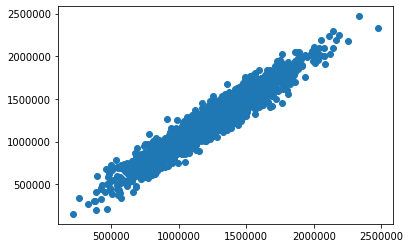

In [38]:
plt.scatter(pred,y_test)
#since we r getting a straight line( y=mx)
#this indicates tested and predicted values r very close to each other

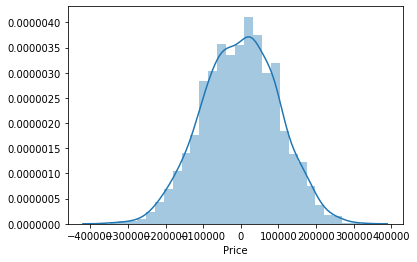

In [41]:
sns.distplot(pred-y_test)
#residual looks like they r normally distributes
#this indicates that model is correct choice for data 

# Regression Evaluation matrices

In [42]:
print('mean absolute error :',mean_absolute_error(pred,y_test))
print('mean squared error :',mean_squared_error(pred,y_test))
print('root mean squares error :',np.sqrt(mean_squared_error(pred,y_test)))

mean absolute error : 80893.81190770201
mean squared error : 10013679978.582806
root mean squares error : 100068.3765161742


# Real Dataset of a House

In [22]:
from sklearn.datasets import load_boston

In [23]:
b=load_boston()

In [26]:
b.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [43]:
b.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
b.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [51]:
df1=pd.DataFrame(b.data,columns=b.feature_names)

In [48]:
df1['target']=b.target

In [49]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
x=b.data
y=b.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [54]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
pred=lr_model.predict(x_test)

In [56]:
r2_score(pred,y_test)

0.6709558976744427

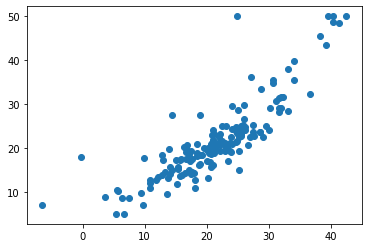

In [58]:
plt.scatter(pred,y_test)
#since its not a straight line( y=mx)
#this indicates tested and predicted values are different

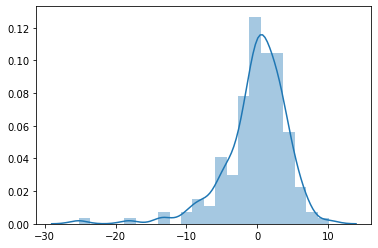

In [64]:
sns.distplot(pred-y_test)
#residual doesn't looks like they r normally distributes
#this indicates that model is not a correct choice for data

In [63]:
print('mean absolute error :',mean_absolute_error(pred,y_test))
print('mean squared error :',mean_squared_error(pred,y_test))
print('root mean squares error :',np.sqrt(mean_squared_error(pred,y_test)))

mean absolute error : 3.1482557548168217
mean squared error : 20.72402343733974
root mean squares error : 4.55236459846306
